In [1]:
import pandas as pd
import numpy as np
import string

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix

#https://observablehq.com/@d3/tree-of-life

Ohter packages to draw graphs
https://github.com/topics/phylogenetic-trees

In [2]:
ddf = pd.read_csv('result/result_matrix_intersection_test.csv',keep_default_na=False)

ddf = ddf.iloc[:,1:]

# making triangular shape
names = ddf.columns.tolist()
lst = ddf.values.tolist()
for idx, row in enumerate(lst):
    del row[idx+1:]

#lst

In [3]:
#ddf

In [4]:
df = lst
dm = DistanceMatrix(names=names, matrix=df)
constructor = DistanceTreeConstructor()
upgmatree = constructor.upgma(dm)
#print(upgmatree)

#njtree = constructor.nj(dm)
#print(njtree)

In [5]:
from Bio import Phylo
upgmatree.ladderize()  # Flip branches so deeper clades are displayed at top
Phylo.draw_ascii(upgmatree)

#A=A1=A2=A4	A3	A+B	B=B1	D	C
#todo mark distance

  ________________________________________________________________ C
 |
 |                                                        ______________ A+B
_|                                                _______|
 |                                               |       |              , B1
 |                                               |       |______________|
 |_______________________________________________|                      | B
                                                 |
                                                 |       _______________ D
                                                 |______|
                                                        |          _____ A3
                                                        |_________|
                                                                  |     , A
                                                                  |_____|
                                                                        , A1
          

phylo tree to Newick

In [6]:
from Bio.Phylo import NewickIO

# f = open('result/nwtree.txt', 'w')
# fileNo = NewickIO.write([upgmatree],f)
# print(fileNo)

with open('result/nwtree.txt', 'w') as file:
    fileNo = NewickIO.write([upgmatree],file)
    print(fileNo)

tree_text = ""
with open('result/nwtree.txt', 'r') as file:
    tree_text = file.read().replace('\n', '')
    
print(tree_text)


#save as json
# d3treeview-app/src
#{
#   "newick": "(((aaaa:2.00000,bbbb:3.00000)Inner1:3.00000,ccccc:4.00000)Inner2:2.00000,dddddddd:2.00000,eeeeeeee:1.00000)Inner3:0.00000;"
# }



1
(C:0.50000,((A+B:0.11538,(B1:0.00000,B:0.00000)Inner1:0.11538)Inner6:0.06835,(D:0.13056,(A3:0.05000,(A:0.00000,(A1:0.00000,(A4:0.00000,A2:0.00000)Inner2:0.00000)Inner3:0.00000)Inner4:0.05000)Inner5:0.08056)Inner7:0.05318)Inner8:0.36944)Inner9:0.00000;


In [8]:
import json

dict = {
    "newick": tree_text
}
json_obj = json.dumps(dict, indent=4)

with open("d3treeview-app/src/tree.json","w") as outfile:
    outfile.write(json_obj)

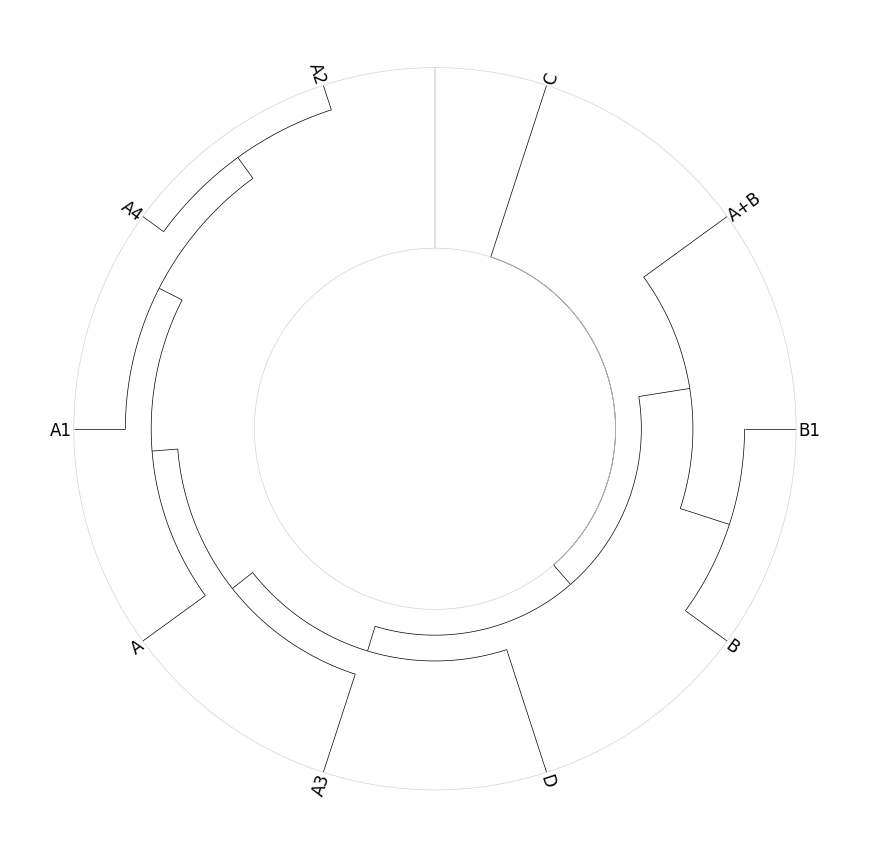

In [9]:
from pycirclize import Circos
from io import StringIO
from Bio import Phylo

# Load newick tree
tree = Phylo.read(StringIO(tree_text), "newick")

# Initialize circos sector by tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((50, 100))
track.axis(ec="lightgrey")
track.tree(tree, leaf_label_size=12)

fig = circos.plotfig()

#Pretty options
#https://moshi4.github.io/pyCirclize/phylogenetic_tree/

In [10]:
# Load newick tree
tree = Phylo.read(StringIO(tree_text), "newick")

# Initialize circos sector with tree size
circos = Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree with node color annotation
track = sector.add_track((30, 100))
track.axis(ec="lightgrey")
track.tree(
    tree,
    leaf_label_size=12,
    innode_label_size=12,
    line_kws=dict(lw=2),
    # User can set the color of specified nodes.
    # When multiplue node are specified, MRCA(Most Recent Common Ancestor) node
    # in multiple nodes are automatically specified.
    node_color_list=[
        (["Inner5"], "green"),
        (["Inner8"], "purple"),
        (["Inner9"], "orange"),
        (["Inner7"], "red"),
    ],
)

fig = circos.plotfig()


TypeError: 'dict' object is not callable